# ***Air Quality Prediction***


In [5]:
import numpy as np
import pandas as pd

# **Data Understanding**

In [6]:
df=pd.read_csv('/content/air_pollution_data.csv')

In [7]:
df.head()

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53


In [8]:
df.isnull().sum()

,0
city,0
date,0
aqi,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    23504 non-null  object 
 1   date    23504 non-null  object 
 2   aqi     23504 non-null  int64  
 3   co      23504 non-null  float64
 4   no      23504 non-null  float64
 5   no2     23504 non-null  float64
 6   o3      23504 non-null  float64
 7   so2     23504 non-null  float64
 8   pm2_5   23504 non-null  float64
 9   pm10    23504 non-null  float64
 10  nh3     23504 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


In [10]:
df.describe()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,23504.000000,23504.000000,23504.00000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000
mean,3.920354,1113.224543,6.00554,25.044104,35.059777,15.971449,98.598310,121.848091,12.060212
std,1.415490,1401.770372,24.50272,25.839242,31.901760,23.943464,135.572391,160.429589,17.544759
min,1.000000,173.570000,0.00000,0.310000,0.000000,0.190000,0.500000,0.580000,0.000000
25%,3.000000,447.270000,0.00000,8.740000,7.870000,4.470000,24.677500,32.277500,2.340000
50%,5.000000,700.950000,0.00000,16.450000,28.250000,7.990000,58.860000,75.775000,6.520000
75%,5.000000,1188.280000,0.27000,32.220000,54.360000,16.450000,117.605000,147.642500,15.830000
max,5.000000,23071.290000,457.76000,331.760000,406.270000,442.510000,2203.550000,2429.130000,352.620000


## ***Data Preprocessing***

In [11]:
df.replace(-200, np.nan, inplace=True)

In [12]:
df.fillna(df.mean,inplace=True)

In [13]:
df['datetime']= pd.to_datetime(df['date'], format='%d-%m-%Y')

# feature engineering

In [14]:
features=['co', 'no','no2','o3','so2','pm2_5','pm10','nh3']
target=['aqi']

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df[features])
y_scaled=df[target].values

# **Model Development**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.2,random_state=42)

In [26]:
from prophet import Prophet
df_prophet=df[['datetime','aqi']].rename(columns={'datetime':'ds','aqi':'y'})

In [27]:
!pip install --upgrade prophet cmdstanpy
model=Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
future=model.make_future_dataframe(periods=7, freq='D')
forecast=model.predict(future)

# **Model Evaluation**

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_true=df_prophet['y'][-7:]
y_pred=forecast['yhat'][-7:]

mae=mean_absolute_error(y_true,y_pred)
rmse=np.sqrt(mean_squared_error(y_true,y_pred))
r2_score=r2_score(y_true,y_pred)
print('MAE:',mae)
print('RMSE:',rmse)
print('R2 Score:',r2_score)

MAE: 0.3845211834987617
RMSE: 0.5771973652450413
R2 Score: -0.16604879456036148


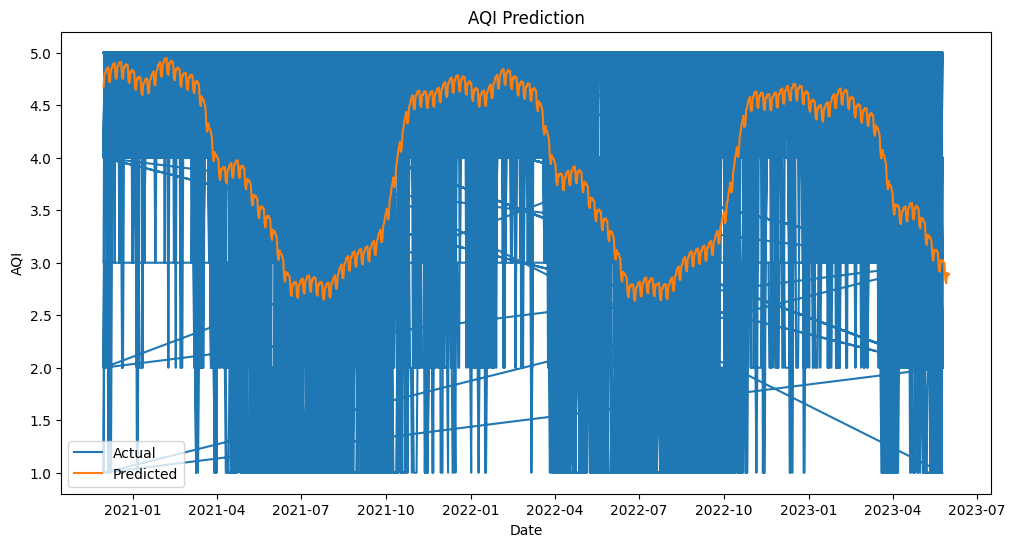

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df_prophet['ds'],df_prophet['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Predicted')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Prediction')
plt.legend()
plt.show()